## Условие 1: Задача 1
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

### 1.1. Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/5198320/attachment/413c9d132a9490a07d403efd04648f9c.csv

* id - Уникальный ID для каждого дома
* date - Дата продажи дома
* price - Стоимость продажи дома
* bedrooms - Кол-во спален
* bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
* sqft_living - Кв. метры жилые
* sqft_lot - Кв. метры общие
* floors - Кол-во этажей
* waterfront - Есть набержная или нет
* view - Значение от 0 до 4 насколько хороший вид
* condition - Значение от 1 до 5 насколько хорошее состояние
* grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
* sqft_above - Кв. метры дома, которые находятся выше земли
* sqft_basement - Кв. метры дома, которые находятся ниже земли
* yr_built - Год постройки дома
* yr_renovated - Год ремонта дома
* zipcode - Индекс
* lat - Широта
* long - Долгота
* sqft_living15 - Кв. метры жилой площади у 15 соседей
* sqft_lot15 - Кв. метры общей площади у 15 соседей

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('kc_house_data (1).csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

In [6]:
import matplotlib.pyplot as plt

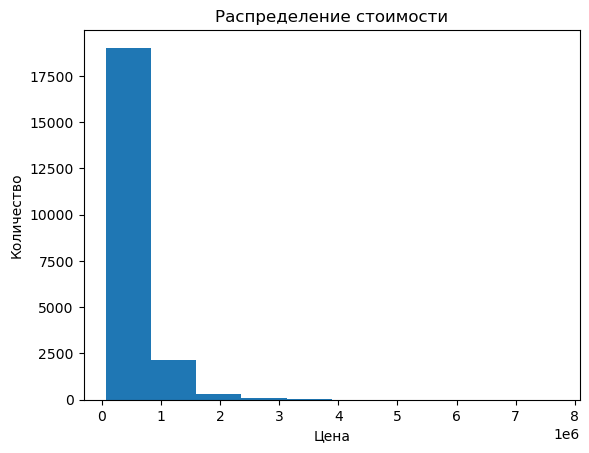

In [13]:
plt.hist(df['price'])
plt.title('Распределение стоимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

### 1.3 Изучите распределение квадратуры жилой

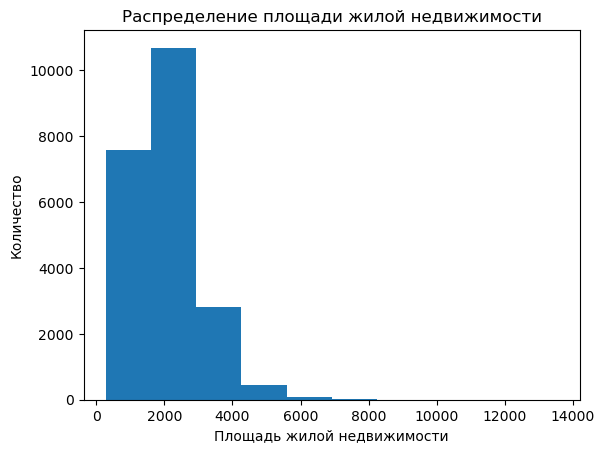

In [16]:
plt.hist(df['sqft_living'])
plt.title('Распределение площади жилой недвижимости')
plt.xlabel('Площадь жилой недвижимости')
plt.ylabel('Количество');

#### Вывод:
Основная часть домов имеет площадь от 300 до 3000 усл.ед.

### 1.4 Изучите распределение года постройки

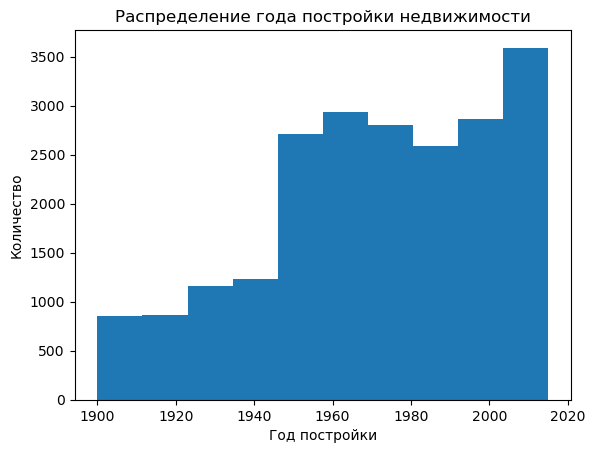

In [17]:
plt.hist(df['yr_built'])
plt.title('Распределение года постройки недвижимости')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

#### Вывод:
Основная часть домов построена с 1950 по 2015гг.

## Условие 2: 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную
* Постройте график
* Сделайте выводы

In [33]:
data = (df['waterfront'].value_counts())
data


0    21450
1      163
Name: waterfront, dtype: int64

#### Вариант 1 без присвоения переменных

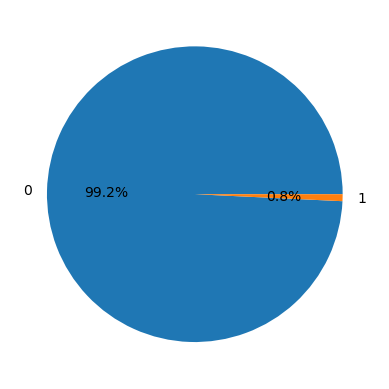

In [27]:
plt.pie(data.values, autopct='%.1f%%', labels = data.index);

#### Вариант 2 с присовением переменных

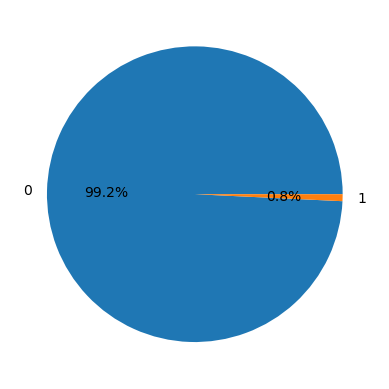

In [28]:
names = data.index
values = data.values
plt.pie(values, autopct='%.1f%%', labels = names);

#### Вывод:


### 2.2 Изучите распределение этажей домов
* Постройте график
* Сделайте выводы

In [36]:
data = (df['floors'].value_counts())
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

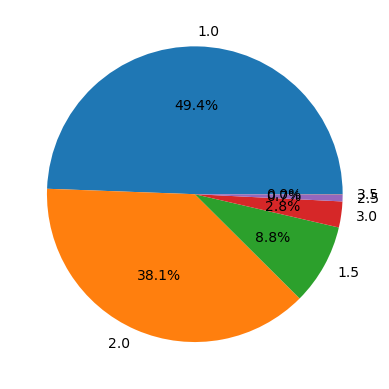

In [39]:
names = data.index
values = data.values
plt.pie(values, autopct='%.1f%%', labels = names);

#### Вывод:
Половина всех домов одноэтажные

#### 2.2 Изучите распределение состояния домов
* Постройте график
* Сделайте выводы

In [42]:
data = (df['condition'].value_counts())
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

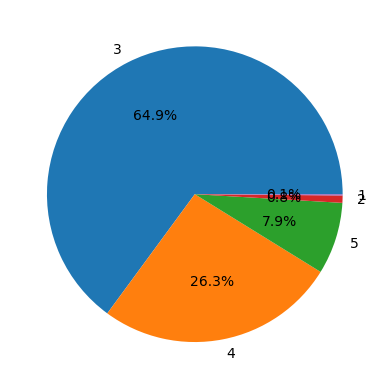

In [43]:
names = data.index
values = data.values
plt.pie(values, autopct='%.1f%%', labels = names);

#### Вывод:
2/3 всех домов имеют удовлетворительное состояние.

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [44]:
import numpy as np

In [56]:
corr = df.corr()
corr = np.round(corr, 1)
corr[np.abs(corr)<0.1] = 0
corr

C:\Users\l.nosonova\AppData\Local\Temp\ipykernel_12708\1975189929.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1
price,0.0,1.0,0.3,0.5,0.7,0.1,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.1,0.1,-0.1,0.3,0.0,0.6,0.1
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.2,0.0,0.1,0.0,0.4,0.5,0.3,0.2,0.0,-0.2,0.0,0.1,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.1,0.5,0.1,0.2,-0.1,0.7,0.7,0.3,0.5,0.1,-0.2,0.0,0.2,0.6,0.1
sqft_living,0.0,0.7,0.6,0.8,1.0,0.2,0.4,0.1,0.3,-0.1,0.8,0.9,0.4,0.3,0.1,-0.2,0.1,0.2,0.8,0.2
sqft_lot,-0.1,0.1,0.0,0.1,0.2,1.0,0.0,0.0,0.1,0.0,0.1,0.2,0.0,0.1,0.0,-0.1,-0.1,0.2,0.1,0.7
floors,0.0,0.3,0.2,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,-0.2,0.5,0.0,-0.1,0.0,0.1,0.3,0.0
waterfront,0.0,0.3,0.0,0.1,0.1,0.0,0.0,1.0,0.4,0.0,0.1,0.1,0.1,0.0,0.1,0.0,0.0,0.0,0.1,0.0
view,0.0,0.4,0.1,0.2,0.3,0.1,0.0,0.4,1.0,0.0,0.3,0.2,0.3,-0.1,0.1,0.1,0.0,-0.1,0.3,0.1
condition,0.0,0.0,0.0,-0.1,-0.1,0.0,-0.3,0.0,0.0,1.0,-0.1,-0.2,0.2,-0.4,-0.1,0.0,0.0,-0.1,-0.1,0.0


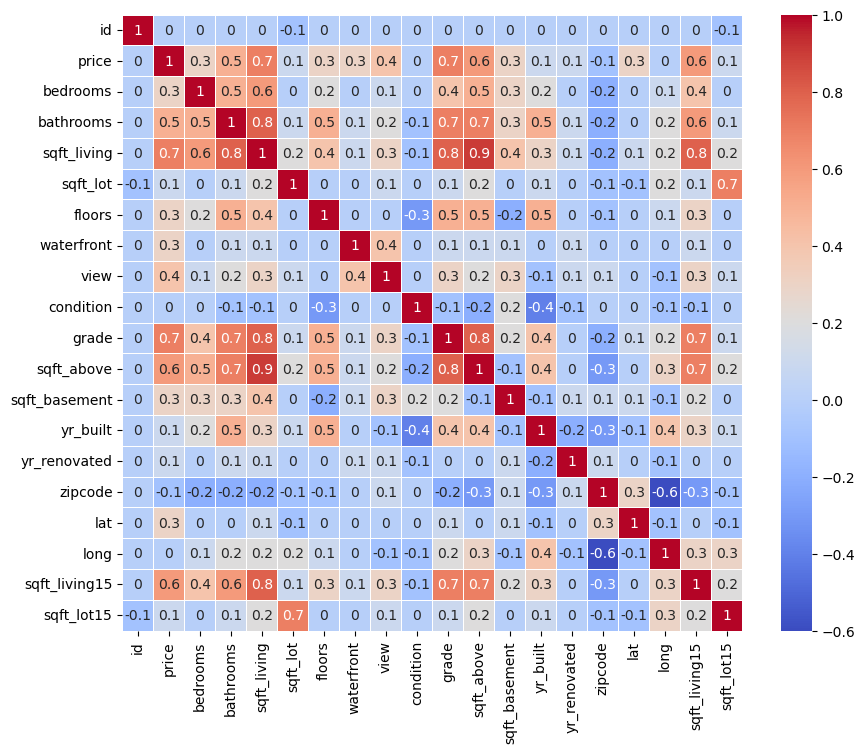

In [57]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, linewidths=.5, cmap = 'coolwarm');

#### Вывод:
Жилые помещения в основном находятся выше уровня земли. Площадь подвальных помещений прямопропорционально зависит от площади жилых помещений.
Чем больше площадь жилых помещений, тем выше уровень конструкции здания и дизайн.
В одном районе находятся в основном одинаковые по конструкции здания, дизайну и жилой площади дома.

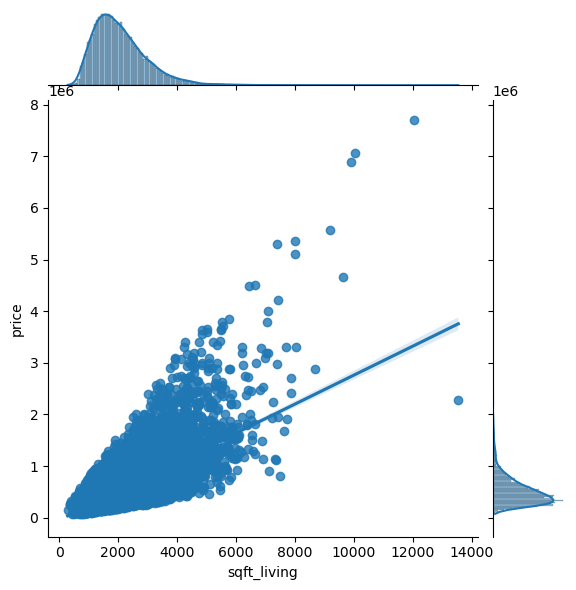

In [58]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind = 'reg');

#### Вывод:
Основная часть домов имеет площадь до 3000 усл.ед. в одинаковом ценовом диапазоне.

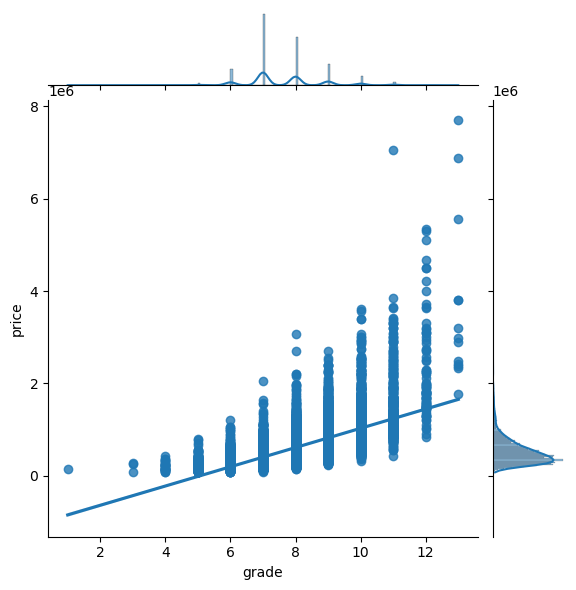

In [59]:
sns.jointplot(x=df['grade'], y=df['price'], kind = 'reg');

#### Вывод:
Чем выше уровень конструкции здания и дизайн, тем выше цена.

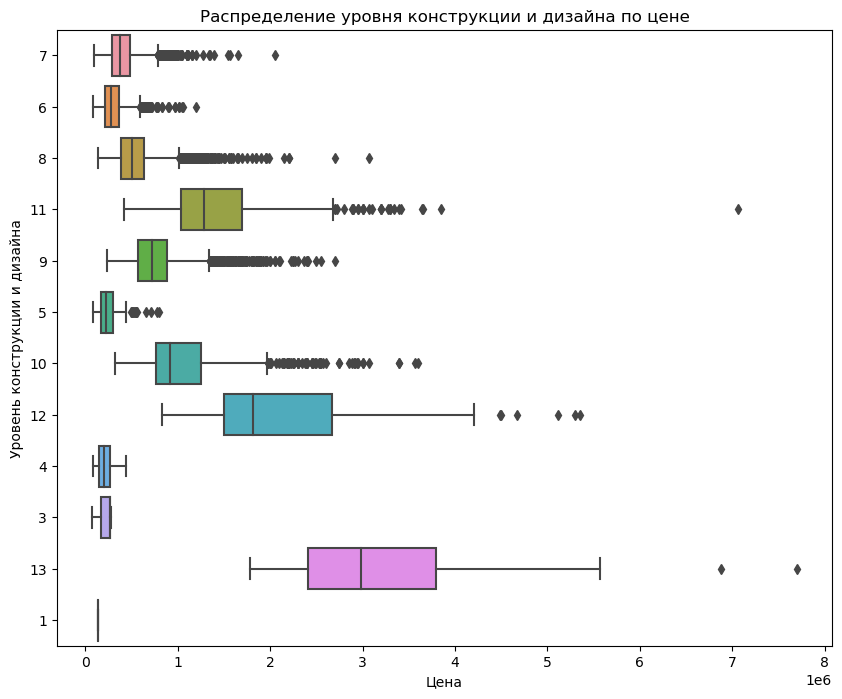

In [61]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis = 1.5);
plt.title('Распределение цены по уровню конструкции и дизайна')
plt.xlabel('Цена')
plt.ylabel('Уровень конструкции и дизайна');

#### Вывод:
Чем выше уровень конструкции и дизайна дома, тем выше цена.

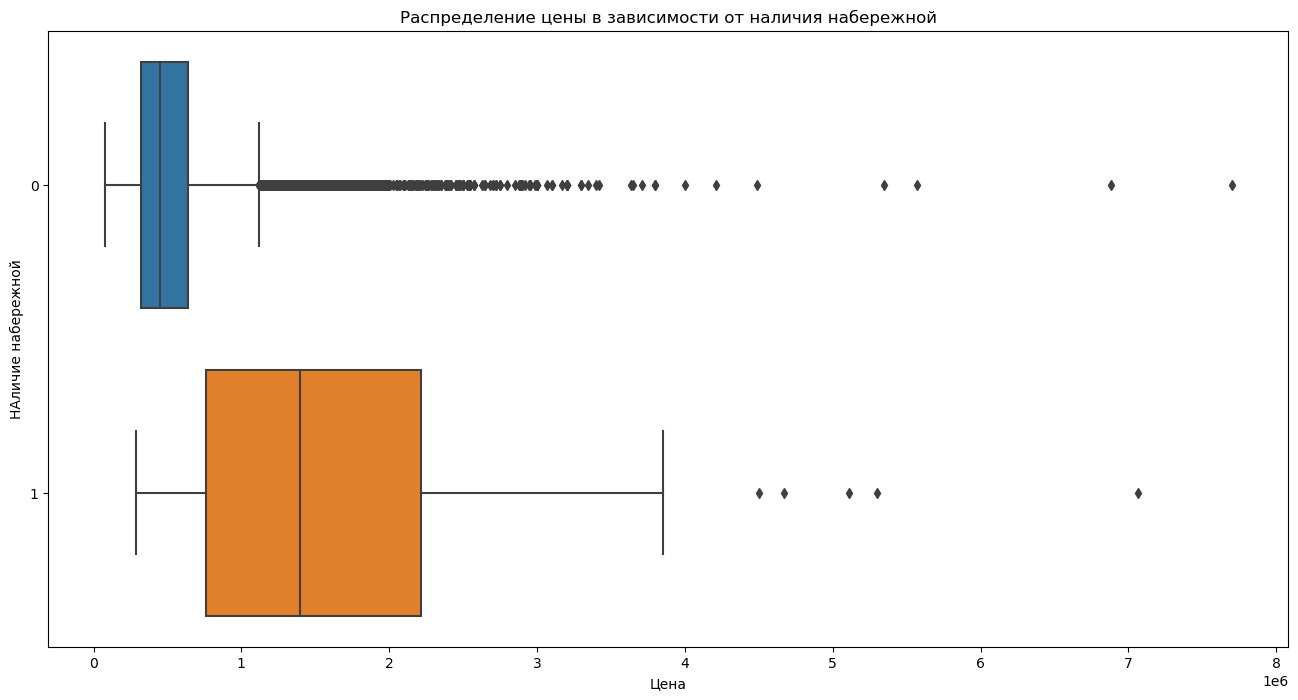

In [62]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis = 1.5);
plt.title('Распределение цены в зависимости от наличия набережной')
plt.xlabel('Цена')
plt.ylabel('Наличие набережной');

#### Вывод:
При наличии набережной цена выше

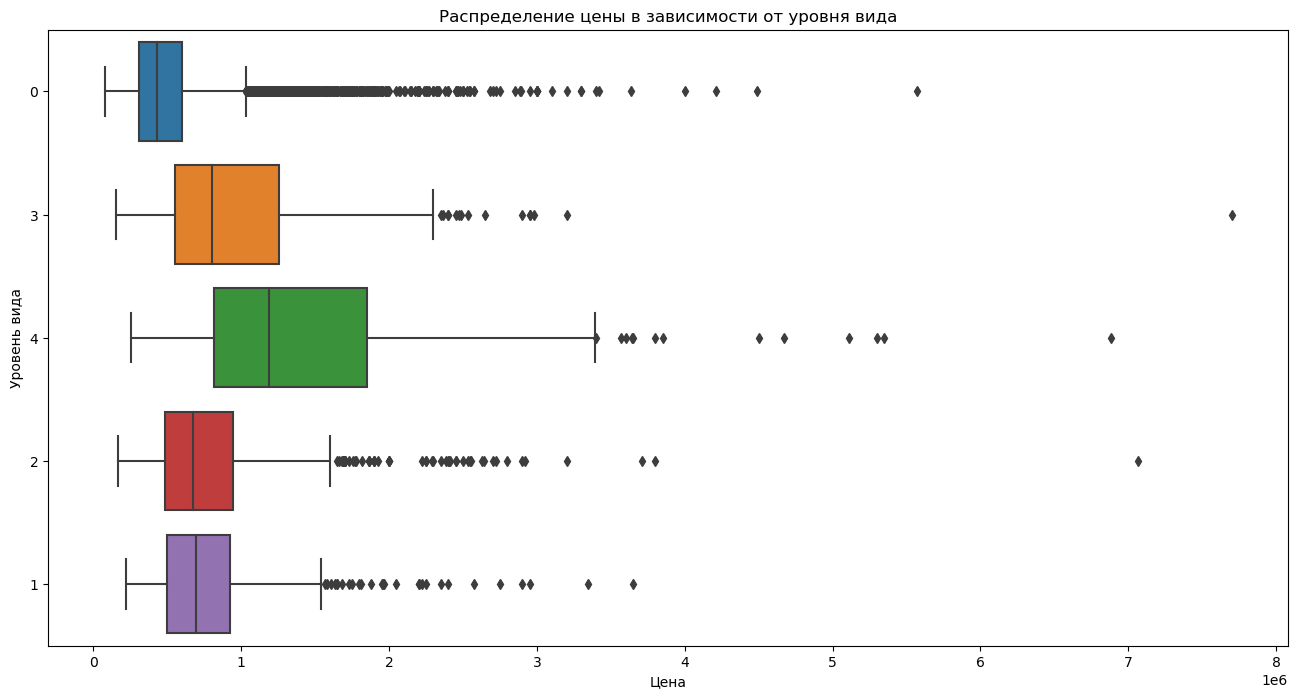

In [64]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis = 1.5);
plt.title('Распределение цены в зависимости от уровня вида')
plt.xlabel('Цена')
plt.ylabel('Уровень вида');

#### Вывод:
Цена не зависит от уровней вида 1 или 2. Но начинает расти при уровне вида 3 и 4. При этом с можно найти недвижимость по одинаковой цене с уровнями вида 3 и 4.

#### Общий вывод:
Цена определяется уровнем конструкции здания и дизайна, наличием набережной и вида.